# Information criteria II

During the last lesson we introduced the __Akaike Information Criterion (AIC)__ as a measure for model selection. 
If $q$ is the likelihood of the model associated to our model, the deviance is defined as: 

$$D(q) = -2*\sum_i \log(q_i),$$

and AIC is:

$$ AIC = D_{train} + 2 N_{parameters} $$

We have seen that the model with the lowest AIC is the one that minimizes the Kullback-Leibler distance between the model and the truth. This score is based on information theory, and we can think about it is as a criterion that seeks a model that has a good fit to the truth but few parameters. 

In particular, when we have Gaussian assumptions on the residuals, we have seen that the log-likelihood of a regression model corresponds to:

$$\log(q(\mathbf{y}|\mathbf{X},\mathbf{w},\sigma^2)) = \sum_{i=1}^N \log( \mathcal{N}(y_i|f(\mathbf{x}_i,\mathbf{w}),\sigma^2)\\
=  -\frac{N}{2}\log(\sigma^2) - \frac{N}{2}\log(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i - f(\mathbf{x}_i,\mathbf{w}))^2.
$$

We recall that the _least squares_ estimates of the variance is 

$$ \mathbf{\sigma^2}_{ML} = \frac{1}{N} \sum_{i=1}^N  (y_i - \mathbf{x}_i\mathbf{w}_{ML}^T)^2, $$

where $\mathbf{w}_{ML}$ is the least squares estimate of the regression coefficients. In particular, $ \mathbf{\sigma^2}_{ML} = RSS/N$, where $RSS$ is the residual sum of squares $RSS = \sum_{i=1}^N  (y_i - \mathbf{x}_i\mathbf{w}_{ML}^T)^2$.
We can therefore rewrite the log-likelihood as:

\begin{align*} 
\log(q(\mathbf{y}|\mathbf{X},\mathbf{w},\sigma^2)) & = -\frac{N}{2}\log(\frac{RSS}{N}) - \frac{N}{2}\log(2\pi) - \frac{N}{2} \
& = -\frac{N}{2}\log(\frac{RSS}{N}) + E,
\end{align*}
Where $E$ is a constant that does not depend on the model, but only from the sample size $N$. Therefore, the AIC can be rewritten as:

$$ AIC = N\log(\frac{RSS}{N}) - 2E + 2 N_{parameters} = N\log(RSS) + 2 N_{parameters} + E_2,$$
where again, the term $E_2$ does not depend on the model fit. We note that when two models have the same number of parameters, the difference between the AIC will depend only on the difference between their repsective $RSS$: the selected model is the one with the lowest sum of squares difference. 


## Beyond the AIC

Several other information criteria have been proposed in the literature, each of them based on similar principles as for AIC. For example, based on the observation that the properties of AIC are asymptotic, i.e. they work when the sample size $N$ is large, a corrected version of AIC, called __AICc__, has been proposed.

The AICc is defined as follows:

$$ AICc = AIC + 2 N_{parameters} \frac{(N_{parameters}+1)}{(N-N_{parameters}-1)}. $$

We note that when $N$ is very large, the AICc converges to AIC, while the correction factor will be more relevant for small sample sizes. The rule of thumb for using AICc is when the ratio $\frac{N}{N_{parameters}}$ is less than 40, and in general, AICc is always preferred to AIC.

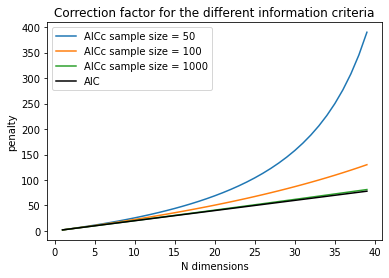

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def AIC_penalty(k):
    return 2*k

def AICc_penalty(k,n):
    return 2*k + 2*k*(k+1)/(n-k-1)

sample_size = [50, 100, 1000]


## for each sample size n and model parameters k, compute the AICc
for n in sample_size:
    AICc_term = []
    for k in np.arange(1,40):
        AICc_term.append(AICc_penalty(k,n))

    plt.plot(np.arange(1,40),AICc_term, label = 'AICc sample size = ' + str(n), linestyle = '-')

    
## The AIC is independent on the sample size n, and is computed only once    
plt.plot(np.arange(1,40),2*np.arange(1,40), label = 'AIC', linestyle = '-', color = 'black')    
plt.title('Correction factor for the different information criteria')
plt.xlabel('N dimensions')
plt.ylabel('penalty')
plt.legend()    
plt.show()


We note that the increment of AIC is constant $\Delta(AIC) = 2(k+1) - 2k = 2$, while the increment of $AICc$ is more complex:

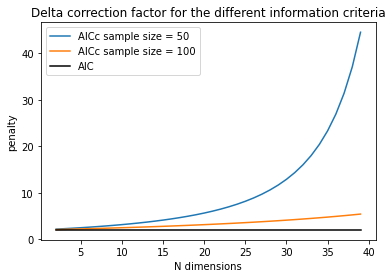

In [8]:
## Plot Delta(AICc) for each sample size n and model parameters k
for n in sample_size:
    AICc_term = []
    for k in np.arange(1,40):
        AICc_term.append(AICc_penalty(k,n))

    plt.plot(np.arange(2,40),np.diff(AICc_term), label = 'AICc sample size = ' + str(n), linestyle = '-')

plt.plot(np.arange(2,40),np.diff(2*np.arange(1,40)), label = 'AIC', linestyle = '-', color = 'black')    
plt.title('Delta correction factor for the different information criteria')
plt.xlabel('N dimensions')
plt.ylabel('penalty')
plt.legend()    
plt.show()

Another widely used criterion for model selection is the __Bayesian information criterion (BIC)__ (or Schwarz information criterion). This criterion is closely related to the AIC as it is defined as:


$$ BIC = D_{train} + 2  N_{parameters} \log{N} .$$ 

Similarly to the AIC, the BIC penalizes the increase of the likelihood by the number of parameters used to fit the model. The penalty term is however much larger for BIC than for AIC. Let's see this in practice.

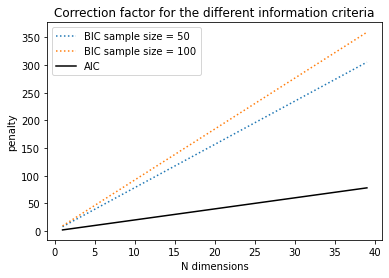

In [7]:
def BIC_penalty(k,n):
    return 2*k*np.log(n)

sample_size = [50, 100]

## for each sample size n and model parameters k, compute the BIC
for n in sample_size:
    BIC_term = []
    for k in np.arange(1,40):
        BIC_term.append(BIC_penalty(k,n))

    plt.plot(np.arange(1,40),BIC_term, label = 'BIC sample size = ' + str(n), linestyle = ':')

plt.plot(np.arange(1,40),2*np.arange(1,40), label = 'AIC', linestyle = '-', color = 'black')    
plt.title('Correction factor for the different information criteria')
plt.xlabel('N dimensions')
plt.ylabel('penalty')
plt.legend()    
plt.show()



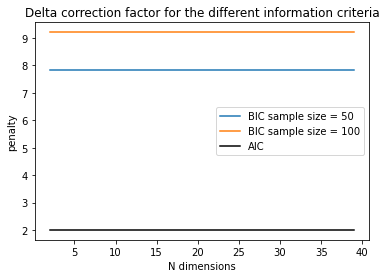

In [6]:
## Plot Delta(BIC) for each sample size n and model parameters k
for n in sample_size:
    BIC_term = []
    for k in np.arange(1,40):
        BIC_term.append(BIC_penalty(k,n))

    plt.plot(np.arange(2,40),np.diff(BIC_term), label = 'BIC sample size = ' + str(n), linestyle = '-')

plt.plot(np.arange(2,40),np.diff(2*np.arange(1,40)), label = 'AIC', linestyle = '-', color = 'black')    
plt.title('Delta correction factor for the different information criteria')
plt.xlabel('N dimensions')
plt.ylabel('penalty')
plt.legend()    
plt.show()

Due to the large penalization on the number of parameters, it is known that BIC tends to prefer much simpler models than AIC. 


## Information criteria in action

In what follows we are going to analyze the behaviour of these 3 critera in a practical case. 
We define as usual synthetic data according to a multivariate regression model.


In [27]:
N = 20
d = 5

# Define as usual our random data x
x = np.random.randn(N*d).reshape(N,d)

# We randomly generate the d regression coefficients
coefficients = 5*np.random.randn(d)

# We set to 0 the first coefficients to generate meaningless variables
coefficients[:2] = 0

print('The regression coefficients are :\n {}'.format(coefficients))

The regression coefficients are :
 [0.         0.         5.34776055 9.97013414 3.10369994]


In [28]:
var_noise = 3
noise = np.random.randn(N) * var_noise

y = x.dot(coefficients)  + noise

print('The observed data has shape {0}, with mean {1:2.2f} and variance {2:2.2f}'.format(y.shape, np.mean(y), np.var(y)))

The observed data has shape (20,), with mean -7.70 and variance 135.16


In the way we defined our regression, there will be less informative variables than the number of model parameters. The information criteria should allow to detect this aspect.

Once we generated our data, we compute the information criteria to identify the best combination of coefficients to describe the output:

In [29]:
import itertools

# Supporting functions for model fitting
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

In [30]:
# case all features

predictor_all = x

w_all, sigma2_all = fit_poly(predictor_all,y)
deviance_all = -2*Gaussian_loglik(predictor_all,y, w_all, sigma2_all)

penalization_AIC = 2 * len(w_all)
penalization_BIC = 2 * len(w_all) * np.log(x.shape[0])
penalization_AICc = penalization_AIC + 2*len(w_all)*(len(w_all)+1)/(x.shape[0]-len(w_all)-1)

AIC_all = deviance_all + penalization_AIC
BIC_all = deviance_all + penalization_BIC
AICc_all = deviance_all + penalization_AICc

print('All features')
print('Dev' , 'AIC', 'BIC', 'AICc')
print(round(deviance_all), round(AIC_all), round(BIC_all), round(AICc_all))

# case last 3 features

predictor_3 = x[:,2:]
w_3, sigma2_3 = fit_poly(predictor_3,y)
deviance_3 = -2*Gaussian_loglik(predictor_3,y, w_3, sigma2_3)

penalization_AIC = 2 * len(w_3)
penalization_BIC = 2 * len(w_3) * np.log(x.shape[0])
penalization_AICc = penalization_AIC + 2*len(w_3)*(len(w_3)+1)/(x.shape[0]-len(w_3)-1)

AIC_3 = deviance_3 + penalization_AIC
BIC_3 = deviance_3 + penalization_BIC
AICc_3 = deviance_3 + penalization_AICc

print('3 features')
print('Dev' , 'AIC', 'BIC', 'AICc')
print(round(deviance_3), round(AIC_3), round(BIC_3), round(AICc_3))



All features
Dev AIC BIC AICc
97 107 127 111
3 features
Dev AIC BIC AICc
99 105 117 107


In [31]:
AIC = []
AICc = []
BIC = []
model = []
ll = []
coef = []
sigma2 = []

# For each number of parameters in the model
for n_elements in range(1,d+1):
    # For each combination of variables
    for indices in itertools.combinations(range(d),n_elements):

        # Store the indices corresponding to the parameters
        model.append(indices)
        
        # Fit the model
        x_train = x[:,indices].reshape(x.shape[0],n_elements)
        w_ml, sigma2_ml = fit_poly(x_train,y)
        
        # compute the log-likelihhod
        training_ll = Gaussian_loglik(x_train,y,w_ml,sigma2_ml)
        
        # store the coefficients
        coefficients = np.zeros(d)
        coefficients[[indices]] = w_ml        
        coef.append(coefficients)
        sigma2.append(sigma2_ml)
        
        # store all the metrics
        ll.append( -training_ll)
        AIC.append(-2*training_ll + 2*n_elements)
        AICc.append(-2*training_ll + 2*n_elements + 2.*n_elements*(n_elements+1)/(x.shape[0]-n_elements-1))
        BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
 


results = pd.DataFrame({'model': model, 'AIC': AIC, 'AICc': AICc, 'BIC' :BIC, 
                                 'neg_loglik' : ll, 'coef' : coef, 'sigma2' : sigma2})  
results.sort_values('AIC', ascending = True, inplace = True)
results.reset_index(inplace = True)
model_comparison = results[['model', 'AIC', 'AICc', 'BIC', 'neg_loglik']]

fitted_models = results[['model', 'coef', 'sigma2']]

model_comparison[:10]

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


,model,AIC,AICc,BIC,neg_loglik
0,"(2, 3, 4)",105.317055,106.817055,117.291448,49.658527
1,"(0, 2, 3, 4)",105.933923,108.600589,121.899781,48.966961
2,"(1, 2, 3, 4)",106.272751,108.939417,122.238609,49.136375
3,"(0, 1, 2, 3, 4)",107.051194,111.336908,127.008517,48.525597
4,"(1, 2, 3)",109.575557,111.075557,121.549951,51.787779
5,"(0, 1, 2, 3)",111.137139,113.803806,127.102997,51.568570
6,"(2, 3)",112.211974,112.917856,120.194903,54.105987
7,"(0, 2, 3)",113.765490,115.265490,125.739884,53.882745
8,"(3, 4)",142.863480,143.569362,150.846409,69.431740
9,"(1, 3)",144.236440,144.942322,152.219369,70.118220


## Model comparison and averaging

A classical use of the information criteria consists in keeping the model with the lowest score, and discarding the other. While this procedure is legitimated by the definition of information criteria, it discards the information about relative model accuracy provided by the scores. It is indeed very informative to know if relative differences between models are small or large. This difference is a measure on how confident we an be about a model. 

In this section we will study the following operations:

- Model comparison: making use of the information scores to understand why a model outperforms another.
- Model averaging: defining a new model prediction by exploiting the differences between the models.

We start by computing the differences between each AIC and the lowest AIC:

In [32]:
differences_wrt_minimum = model_comparison.AIC - model_comparison.AIC[0]

model_comparison.insert(len(model_comparison.columns), 'd', differences_wrt_minimum)

model_comparison[:10]

,model,AIC,AICc,BIC,neg_loglik,d
0,"(2, 3, 4)",105.317055,106.817055,117.291448,49.658527,0.000000
1,"(0, 2, 3, 4)",105.933923,108.600589,121.899781,48.966961,0.616868
2,"(1, 2, 3, 4)",106.272751,108.939417,122.238609,49.136375,0.955696
3,"(0, 1, 2, 3, 4)",107.051194,111.336908,127.008517,48.525597,1.734139
4,"(1, 2, 3)",109.575557,111.075557,121.549951,51.787779,4.258503
5,"(0, 1, 2, 3)",111.137139,113.803806,127.102997,51.568570,5.820084
6,"(2, 3)",112.211974,112.917856,120.194903,54.105987,6.894919
7,"(0, 2, 3)",113.765490,115.265490,125.739884,53.882745,8.448435
8,"(3, 4)",142.863480,143.569362,150.846409,69.431740,37.546425
9,"(1, 3)",144.236440,144.942322,152.219369,70.118220,38.919385


We note that in terms of differences in AIC, the first models are rather close. This means that they should provide very similar generalization error. Let's verify this in practice:

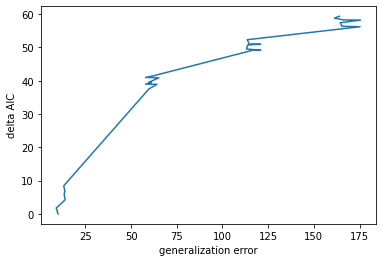

In [34]:
MSE = []
for model in range(len(fitted_models)):
    fold_MSE = []
    for i in range(500):
        x = np.random.randn(1000*d).reshape(1000,d)
        noise = np.random.randn(1000) * var_noise
        y = x.dot(coefficients)  + noise
        prediction = x.dot(fitted_models.coef[model])
        fold_MSE.append(np.mean((y-prediction)**2))
    MSE.append(np.mean(fold_MSE))
    
plt.plot(MSE,model_comparison['d'])
plt.xlabel('generalization error')
plt.ylabel('delta AIC')
plt.show()

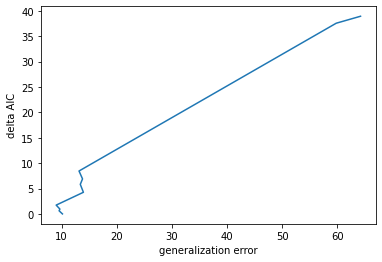

In [35]:
plt.plot(MSE[:10],model_comparison['d'][:10])
plt.xlabel('generalization error')
plt.ylabel('delta AIC')
plt.show()

We notice that in practice, the generalization error correlates nicely with the differences in the AIC between the models. Moreover models with very similiar and high AIC provide very comparable generalization error.

Important quantities for model averaging are the Akaike weights:

$$w_i = \frac{\exp(-\frac{1}{2}\Delta AIC_i)}{\sum_{j=1}^m\exp(-\frac{1}{2}\Delta AIC_j)}. $$

The Akaike weights sum to one, and represent the relative ''importance'' of a model with respect to the associated AIC score. A larger Akaike weight indicates more importance. We could take the Akaike weights as an heuristic of the probability of a given model to perform best on unseen data.

It is important to note that the Akaike weights are subject to sampling variability, and that a different sample will most likely generate a different set of weights for the models in the candidate set.

In [36]:
Akaike_weights = np.exp(-0.5 * model_comparison['d'])/np.sum(np.exp(-0.5 * model_comparison['d']))
model_comparison.insert(len(model_comparison.columns), 'AW', Akaike_weights)

model_comparison[:10]

,model,AIC,AICc,BIC,neg_loglik,d,AW
0,"(2, 3, 4)",105.317055,106.817055,117.291448,49.658527,0.000000,3.339169e-01
1,"(0, 2, 3, 4)",105.933923,108.600589,121.899781,48.966961,0.616868,2.452942e-01
2,"(1, 2, 3, 4)",106.272751,108.939417,122.238609,49.136375,0.955696,2.070674e-01
3,"(0, 1, 2, 3, 4)",107.051194,111.336908,127.008517,48.525597,1.734139,1.403056e-01
4,"(1, 2, 3)",109.575557,111.075557,121.549951,51.787779,4.258503,3.971151e-02
5,"(0, 1, 2, 3)",111.137139,113.803806,127.102997,51.568570,5.820084,1.818960e-02
6,"(2, 3)",112.211974,112.917856,120.194903,54.105987,6.894919,1.062737e-02
7,"(0, 2, 3)",113.765490,115.265490,125.739884,53.882745,8.448435,4.887469e-03
8,"(3, 4)",142.863480,143.569362,150.846409,69.431740,37.546425,2.347122e-09
9,"(1, 3)",144.236440,144.942322,152.219369,70.118220,38.919385,1.181412e-09


The Akaike weights can be used to identify the ''best'' way to combine the model predictions according to their relative importance:

In [37]:
MSE_AW = []
for i in range(500):
    x = np.random.randn(200*d).reshape(200,d)
    noise = np.random.randn(200) * var_noise
    y = x.dot(coefficients)  + noise
    
    prediction = 0
    
    for model in range(len(fitted_models)):
        prediction += model_comparison['AW'][model] * x.dot(fitted_models.coef[model])
    
    MSE_AW.append(np.mean((y-prediction)**2))

MSE = []    
 
MSE.append(MSE_AW)

for model in range(len(fitted_models)):
    fold_MSE = []
    for i in range(500):
        x = np.random.randn(200*d).reshape(200,d)
        noise = np.random.randn(200) * var_noise
        y = x.dot(coefficients)  + noise
        prediction = x.dot(fitted_models.coef[model])
        fold_MSE.append(np.mean((y-prediction)**2))
    MSE.append(fold_MSE)




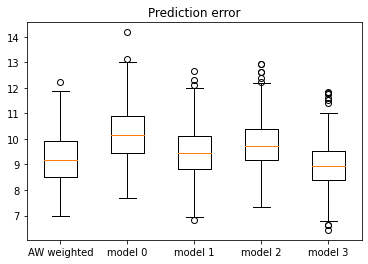

In [38]:
plt.boxplot(MSE[:5], labels = ['AW weighted', 'model 0', 'model 1', 'model 2', 'model 3'])
plt.title('Prediction error')
plt.show()

In the linear model case, the weighted predictions correspond to the predictions obtained by weighting the models' parameters according to the respective Akaike weights:

In [39]:
AIC_weighted_coefs = np.array(Akaike_weights) * np.array(fitted_models['coef'])

AIC_normalized_coefs = np.sum(AIC_weighted_coefs,0)/np.sum(np.array(Akaike_weights))

print('The coefficients normalized by Akaike weights for AIC: \n{0}'.format(AIC_normalized_coefs))

The coefficients normalized by Akaike weights for AIC: 
[ 0.34266567 -0.31590964  6.84800924 10.17488676  1.87115658]


The same exercise canbe repeated for BIC (and AICc):

In [40]:
results.sort_values('BIC', ascending = True, inplace = True)
BIC_model_comparison = results[['model',  'BIC']]

BIC_fitted_models = results[['model', 'coef']]

BIC_model_comparison[:10]

,model,BIC
0,"(2, 3, 4)",117.291448
6,"(2, 3)",120.194903
4,"(1, 2, 3)",121.549951
1,"(0, 2, 3, 4)",121.899781
2,"(1, 2, 3, 4)",122.238609
7,"(0, 2, 3)",125.739884
3,"(0, 1, 2, 3, 4)",127.008517
5,"(0, 1, 2, 3)",127.102997
11,"(3,)",148.756291
8,"(3, 4)",150.846409


We note that the BIC is generally more conservative than AIC. This is because BIC tends to favour the most conservative model, under the assumption that a true model for the data exists. AIC is related to the out-of-sample prediction, and therefore may not point to the true model generating the data, but to the one with best predictive performance. 

In [41]:
BIC_model_comparison.insert(len(BIC_model_comparison.columns), 'd', BIC_model_comparison.BIC - BIC_model_comparison.BIC[0])

Akaike_weights_BIC = np.exp(-0.5 * BIC_model_comparison['d'])/np.sum(np.exp(-0.5 * BIC_model_comparison['d']))
BIC_model_comparison.insert(len(BIC_model_comparison.columns), 'AW for BIC', Akaike_weights_BIC)
BIC_model_comparison[:10]

,model,BIC,d,AW for BIC
0,"(2, 3, 4)",117.291448,0.000000,6.381544e-01
6,"(2, 3)",120.194903,2.903455,1.494337e-01
4,"(1, 2, 3)",121.549951,4.258503,7.589334e-02
1,"(0, 2, 3, 4)",121.899781,4.608332,6.371462e-02
2,"(1, 2, 3, 4)",122.238609,4.947160,5.378529e-02
7,"(0, 2, 3)",125.739884,8.448435,9.340526e-03
3,"(0, 1, 2, 3, 4)",127.008517,9.717068,4.953261e-03
5,"(0, 1, 2, 3)",127.102997,9.811549,4.724708e-03
11,"(3,)",148.756291,31.464842,9.384736e-08
8,"(3, 4)",150.846409,33.554961,3.300339e-08


In [42]:
BIC_weighted_coefs = np.array(Akaike_weights_BIC) * np.array(BIC_fitted_models['coef'])

BIC_normalized_coefs = np.sum(BIC_weighted_coefs,0)/np.sum(np.array(Akaike_weights_BIC))

print('The coefficients normalized by Akaike weights for BIC: \n {0}'.format(BIC_normalized_coefs))

The coefficients normalized by Akaike weights for BIC: 
 [ 0.06854434 -0.161344    6.90126089 10.24897272  1.59794953]


## AIC and leave-one-out

It can be shown that AIC is asymptotically equivalent to leave-one-out. 
We are going to test the equivalence on our synthetic test.

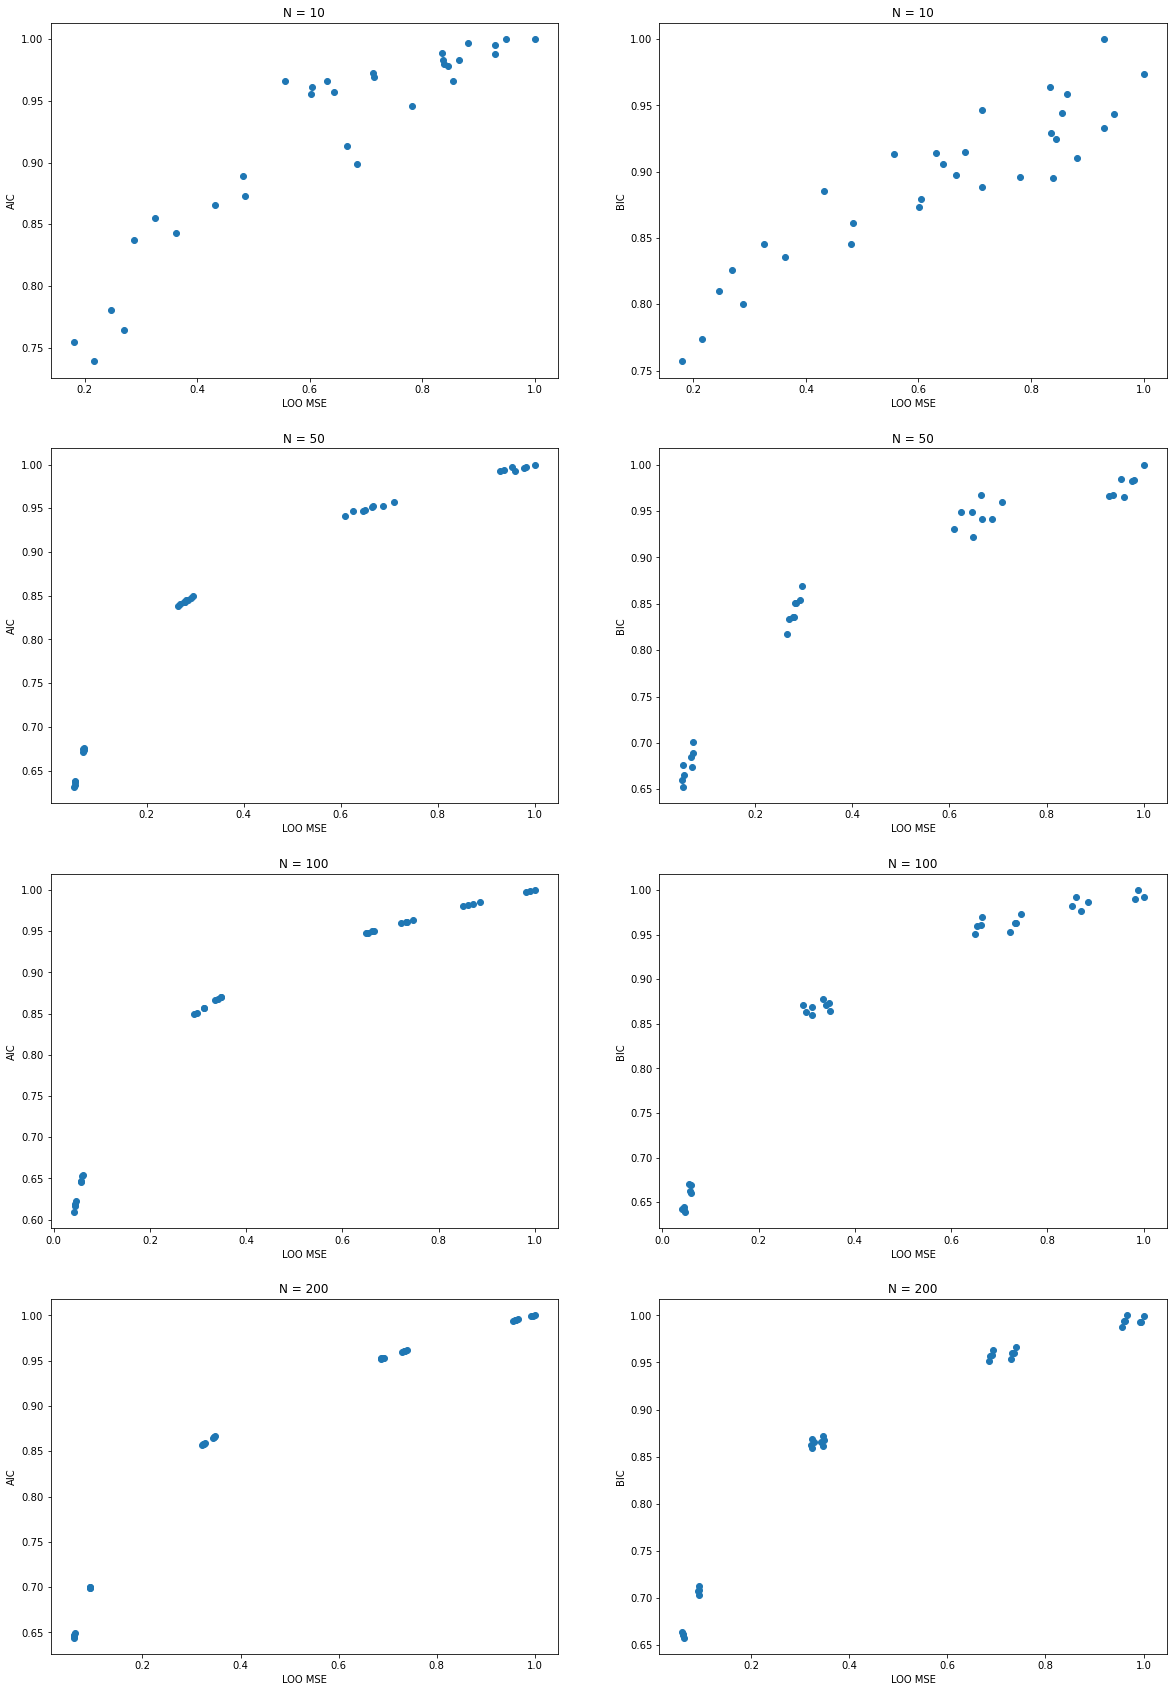

In [44]:
plt.figure(figsize=(20,30))

sample_size = [10, 50, 100, 200]

for i,N in enumerate(sample_size):

    # Define as usual our random data x
    x = np.random.randn(N*d).reshape(N,d)

    var_noise = 3
    noise = np.random.randn(N) * var_noise

    y = x.dot(coefficients)  + noise

    LOO = []
    model = []
    AIC = []
    BIC = []

    for n_elements in range(1,d+1):
        for indices in itertools.combinations(range(d),n_elements):
            testing_ll = []
            model.append(indices)

            testing_MSE = []
            for idx in range(x.shape[0]):
                training_samples = list(range(x.shape[0]))
                training_samples.remove(idx)                                                             
                x_train = x[training_samples,:][:,indices].reshape(x.shape[0]-1,n_elements)
                w_ml, sigma2_ml = fit_poly(x_train, y[training_samples])
                testing_MSE.append((y[idx]-x[idx,indices].dot(w_ml))**2)
        
            LOO.append(np.mean(testing_MSE))

            # Fit the model
            x_train = x[:,indices].reshape(x.shape[0],n_elements)
            w_ml, sigma2_ml = fit_poly(x_train,y)
        
            # compute the log-likelihhod
            training_ll = Gaussian_loglik(x_train,y,w_ml,sigma2_ml)
            AIC.append(-2*training_ll + 2*n_elements)
            BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
        
        
    LOO_results = pd.DataFrame({'model': model, 'AIC' : AIC,  'BIC' : BIC, 'LOO': LOO})  
    
    n_col = 2
    n_row = len(sample_size)

    plt.subplot(n_row,n_col,n_col*i+1)
    plt.title('N = ' + str(N))    
    plt.scatter(LOO_results['LOO']/np.max(LOO_results['LOO']), LOO_results['AIC']/np.max(LOO_results['AIC']))
    plt.xlabel('LOO MSE')
    plt.ylabel('AIC')

    plt.subplot(n_row,n_col,n_col*i+2)
    plt.title('N = ' + str(N))
    plt.scatter(LOO_results['LOO']/np.max(LOO_results['LOO']), LOO_results['BIC']/np.max(LOO_results['BIC']))
    plt.xlabel('LOO MSE')
    plt.ylabel('BIC')

plt.show()
        